In [1]:
from artifacts_ipv6_sra_scanning.config import *
import pickle
import os
import ipaddress
import glob
import pycountry_convert as pycc
import country_converter as coco
from parallel_pandas import ParallelPandas
ParallelPandas.initialize(n_cpu=24, split_factor=1, disable_pr_bar=False)

2025-09-29 21:47:15.159 | INFO     | artifacts_ipv6_sra_scanning.config:<module>:22 - PROJ_ROOT path is: /home/service/artifacts-ipv6-sra-scanning


In [2]:
files = glob.glob(f'{INTERIM_DATA_DIR}/*.csv')

In [3]:
files = [file for file in files if 'ixp-ips' not in file]

In [4]:
files

['/home/service/artifacts-ipv6-sra-scanning/data/interim/router-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/hitlist-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/itdk-ips.csv',
 '/home/service/artifacts-ipv6-sra-scanning/data/interim/ripe-ips.csv']

In [5]:
info_columns = ['Geo','AS-Number','BGP-Prefix','Org']

In [6]:
for column in info_columns:
    for file in files:
        tmp = pl.scan_csv(file)
        print(file)
        print(tmp.group_by(pl.col(column)).agg(pl.len().alias('count')).top_k(10,by='count').collect())

/home/service/artifacts-ipv6-sra-scanning/data/interim/router-ips.csv
shape: (10, 2)
┌─────┬──────────┐
│ Geo ┆ count    │
│ --- ┆ ---      │
│ str ┆ u32      │
╞═════╪══════════╡
│ IND ┆ 35575373 │
│ CHN ┆ 25963412 │
│ DEU ┆ 9290195  │
│ USA ┆ 8761299  │
│ VNM ┆ 8114287  │
│ BRA ┆ 4881168  │
│ THA ┆ 4199434  │
│ PER ┆ 3853804  │
│ MEX ┆ 3200781  │
│ FRA ┆ 3032530  │
└─────┴──────────┘
/home/service/artifacts-ipv6-sra-scanning/data/interim/hitlist-ips.csv
shape: (10, 2)
┌─────┬─────────┐
│ Geo ┆ count   │
│ --- ┆ ---     │
│ str ┆ u32     │
╞═════╪═════════╡
│ USA ┆ 4011320 │
│ FRA ┆ 2644505 │
│ DEU ┆ 1545119 │
│ CHN ┆ 1494445 │
│ GBR ┆ 1128185 │
│ BRA ┆ 872790  │
│ JPN ┆ 870771  │
│ IND ┆ 846023  │
│ NLD ┆ 639408  │
│ BEL ┆ 410658  │
└─────┴─────────┘
/home/service/artifacts-ipv6-sra-scanning/data/interim/itdk-ips.csv
shape: (10, 2)
┌─────┬─────────┐
│ Geo ┆ count   │
│ --- ┆ ---     │
│ str ┆ u32     │
╞═════╪═════════╡
│ USA ┆ 1166352 │
│ NLD ┆ 411342  │
│ CHN ┆ 192615  │
│ IND ┆ 17

In [6]:
ipinfo_asn = pl.read_parquet('/home/service/ipinfos/ipinfo_asn.parquet')

In [7]:
ipinfo_asn = ipinfo_asn.with_columns(pl.col('asn').str.replace('AS','').cast(pl.Float64))

In [8]:
ipinfo_asn

network,asn,domain,name,type,country
str,f64,str,str,str,str
"""1.0.0.0/24""",13335.0,"""cloudflare.com""","""Cloudflare, Inc.""","""hosting""","""US"""
"""1.0.4.0/24""",38803.0,"""gtelecom.com.au""","""Gtelecom Pty Ltd""","""isp""","""AU"""
"""1.0.5.0/24""",38803.0,"""gtelecom.com.au""","""Gtelecom Pty Ltd""","""isp""","""AU"""
"""1.0.6.0/24""",38803.0,"""gtelecom.com.au""","""Gtelecom Pty Ltd""","""isp""","""AU"""
"""1.0.7.0/24""",38803.0,"""gtelecom.com.au""","""Gtelecom Pty Ltd""","""isp""","""AU"""
…,…,…,…,…,…
"""2c0f:ffa8::/32""",37057.0,"""vodacom.co.ls""","""Vodacom Lesotho (Pty) Ltd""","""isp""","""LS"""
"""2c0f:ffc8::/32""",22355.0,"""frogfoot.com""","""Frogfoot Networks""","""isp""","""ZA"""
"""2c0f:ffd0::/32""",36968.0,"""ecn.co.za""","""Electronic Communications Netw…","""isp""","""ZA"""


In [9]:
router_ips = pl.read_csv(files[0])

In [10]:
router_ips = router_ips.filter(pl.col('ip-addr')!='saddr')

In [13]:
router_ips.select('Geo').n_unique()

218

In [20]:
router_ips.group_by('Geo').agg((pl.len()/len(router_ips)).mul(100).round(2).alias('frequency')).sort('frequency',descending=True)

Geo,frequency
str,f64
"""IND""",26.83
"""CHN""",19.58
"""DEU""",7.01
"""USA""",6.61
"""VNM""",6.12
…,…
"""LAO""",0.0
"""JEY""",0.0
"""CYP""",0.0


In [142]:
router_asn = router_ips.select(['Geo','AS-Number']).unique()

In [13]:
router_asn = router_asn.join(ipinfo_asn.select(['asn','type']).unique(),how='left',left_on='AS-Number',right_on='asn')

In [14]:
router_asn['type'].value_counts(normalize=True).sort('proportion')

type,proportion
str,f64
"""inactive""",0.000055
"""government""",0.006239
"""education""",0.027937
null,0.035722
"""business""",0.078511
"""hosting""",0.231338
"""isp""",0.620197


In [34]:
router_asn = router_asn.group_by(['Geo','type']).agg(pl.len().alias('count')).sort('count',descending=True)

In [82]:
router_asn

Geo,type,count,Continent
str,str,u32,str
"""BRA""","""isp""",5094,"""SA"""
"""USA""","""isp""",798,"""NA"""
"""USA""","""hosting""",728,"""NA"""
"""DEU""","""hosting""",475,"""EU"""
"""IND""","""isp""",417,"""AS"""
…,…,…,…
"""COD""",null,1,"""AF"""
"""TCA""","""isp""",1,"""NA"""
"""TZA""","""government""",1,"""AF"""


In [56]:
def map_iso3_to_continent(cc):
    if cc=='XK' or cc=='SXM':
        # kosovo is EU state, count saint marten as EU state (netherland territory)
        return 'EU'
    if cc=='UMI':
        #count umi states as US territory --> NA
        return 'NA'
    if cc=='TLS':
        # timor leste is asian state
        return 'AS'    
    alpha2 = pycc.country_alpha3_to_country_alpha2(cc)
    return pycc.country_alpha2_to_continent_code(alpha2) 

In [57]:
router_asn = router_asn.with_columns(
    pl.col("Geo").map_elements(map_iso3_to_continent, return_dtype=pl.Utf8).alias("Continent")
).filter((pl.col('Geo').is_not_null()) & (pl.col('Geo')!='ATA'))
#filter antarctica values (ATA) --> only 5, not of interest and not very trustworthy imo

In [83]:
counts = (
    router_asn.group_by(["Continent", "type"])
      .agg(pl.col('count').sum().alias("continent_count"))
)

rel_freq = (
    counts.with_columns(
        ((pl.col("continent_count") / pl.col("continent_count").sum()).mul(100).round(2).over("Continent")).alias("rel_freq")
    )
)

table = (
    rel_freq.pivot(
        values="rel_freq",
        index="type",
        columns="Continent"
    )
    .fill_null(0.0)  # if some combos are missing
)

/tmp/ipykernel_879719/3987231449.py:13: DeprecationWarning: The argument `columns` for `DataFrame.pivot` is deprecated. It has been renamed to `on`.
  rel_freq.pivot(


In [85]:
counts.group_by('Continent').agg(pl.col('continent_count').sum()).sort('continent_count',descending=True)

Continent,continent_count
str,u32
"""SA""",6169
"""EU""",5304
"""AS""",3079
"""NA""",2779
"""AF""",404
"""OC""",351


In [94]:
order = counts.group_by('Continent').agg(pl.col('continent_count').sum()).sort('continent_count',descending=True).select('Continent').to_series().to_list()

In [98]:
order_types = ["ISP", "Hosting", "Business", "Education", "Government", "Inactive", "Unknown"]

In [104]:
table = table.fill_null('Unknown').with_columns(
    pl.when(pl.col("type") == "isp")
      .then(pl.lit("ISP"))  # special case
      .otherwise(
          pl.col("type").str.slice(0,1).str.to_uppercase() + pl.col("type").str.slice(1).str.to_lowercase()
      )
      .alias("type")
).select(['type']+order).with_columns(
    pl.col("type").map_elements(lambda x: order_types.index(x), return_dtype=pl.Int32).alias("_sort_key")
).sort('_sort_key').drop('_sort_key').to_pandas().set_index('type')

/home/service/artifacts-ipv6-sra-scanning/reports/figures/heatmap-network-types-sra.png


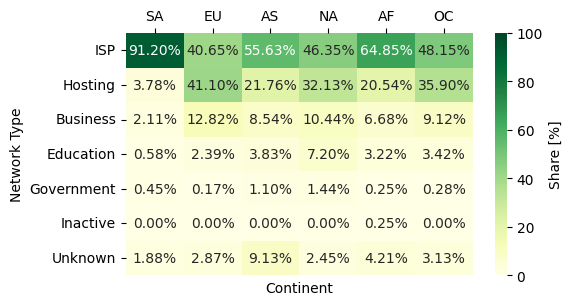

In [139]:
import seaborn as sns
import matplotlib.colors as mpc

figsize = (8*0.7,4.5*0.7)
fig,ax = vh.fig_ax(figsize)

annot_labels = table.map(lambda x: f"{x:.2f}%")
sns.heatmap(table,fmt="",
            linecolor='white',
            cmap='YlGn',
            annot=annot_labels,
            vmin=0,
            vmax=100,
            ax=ax,
            cbar_kws={'label': 'Share [%]',"orientation": "vertical","shrink":1,'location':'right'})
ax.xaxis.tick_top()
ax.set_ylabel('Network Type')
ax.set_xlabel('Continent')

vh.save_plot(fig,'heatmap-network-types-sra')

In [136]:
print(table.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrrrrr}
\toprule
 & SA & EU & AS & NA & AF & OC \\
type &  &  &  &  &  &  \\
\midrule
ISP & 91.20 & 40.65 & 55.63 & 46.35 & 64.85 & 48.15 \\
Hosting & 3.78 & 41.10 & 21.76 & 32.13 & 20.54 & 35.90 \\
Business & 2.11 & 12.82 & 8.54 & 10.44 & 6.68 & 9.12 \\
Education & 0.58 & 2.39 & 3.83 & 7.20 & 3.22 & 3.42 \\
Government & 0.45 & 0.17 & 1.10 & 1.44 & 0.25 & 0.28 \\
Inactive & 0.00 & 0.00 & 0.00 & 0.00 & 0.25 & 0.00 \\
Unknown & 1.88 & 2.87 & 9.13 & 2.45 & 4.21 & 3.13 \\
\bottomrule
\end{tabular}



In [144]:
router_asn.select('Geo').n_unique()

218

In [145]:
router_asn

Geo,AS-Number
str,f64
"""ESP""",202829.0
"""SGP""",63949.0
"""USA""",297.0
"""BRA""",264915.0
"""BRA""",52888.0
…,…
"""USA""",10835.0
"""USA""",215019.0
"""USA""",14777.0
